# welcome 


### Data description 
### Main dataset: 
### This dataset informs the medical situation of individuals segregation the observations by municipality, serializing them and providing income data of each one of them. Also, it provides an specific score about overall health & the case of an specific condition.

reading the data set and taking how many null exist 


In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

url3 = r"Main_Dataset.csv"
md = pd.read_csv(url3)
url2 = r"Sociodemographics Data.csv"
sd = pd.read_csv(url2)
url1 = r"Municipality Pollution Data.csv"
mu = pd.read_csv(url1)

In [13]:
filterd_values_md = md[md.isnull().any(axis=1)]
filterd_values_sd = sd[sd.isnull().any(axis=1)]
filterd_values_mu = mu[mu.isnull().any(axis=1)]

Getting ride of the nule values in order to perform god plots
- merged is a intermidate table 
- symmetric diff is the table without nule observations so we can develop better ploting 
- md is the base data set


In [14]:

# Perform FULL OUTER JOIN with indicator
merged = md.merge(filterd_values_md, on="ID", how="outer", indicator=True)

# Exclude intersection (i.e., rows present in both df1 and df2)
symmetric_diff = merged[merged["_merge"] != "both"].drop(columns=["_merge"])
symmetric_diff = symmetric_diff.drop(symmetric_diff.columns[12:23], axis=1)


category_counts = symmetric_diff['Medical_Condition_x'].value_counts()
category_counts = category_counts.loc[category_counts.index != "Healthy"]


Creation of the plot


/tmp/ipykernel_1678/4238464545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


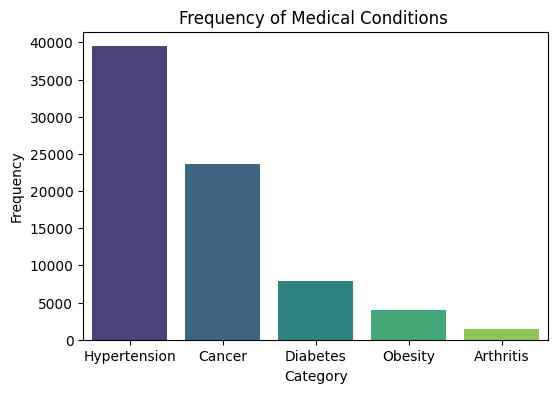

In [15]:
# Create bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Frequency of Medical Conditions ")
plt.show()

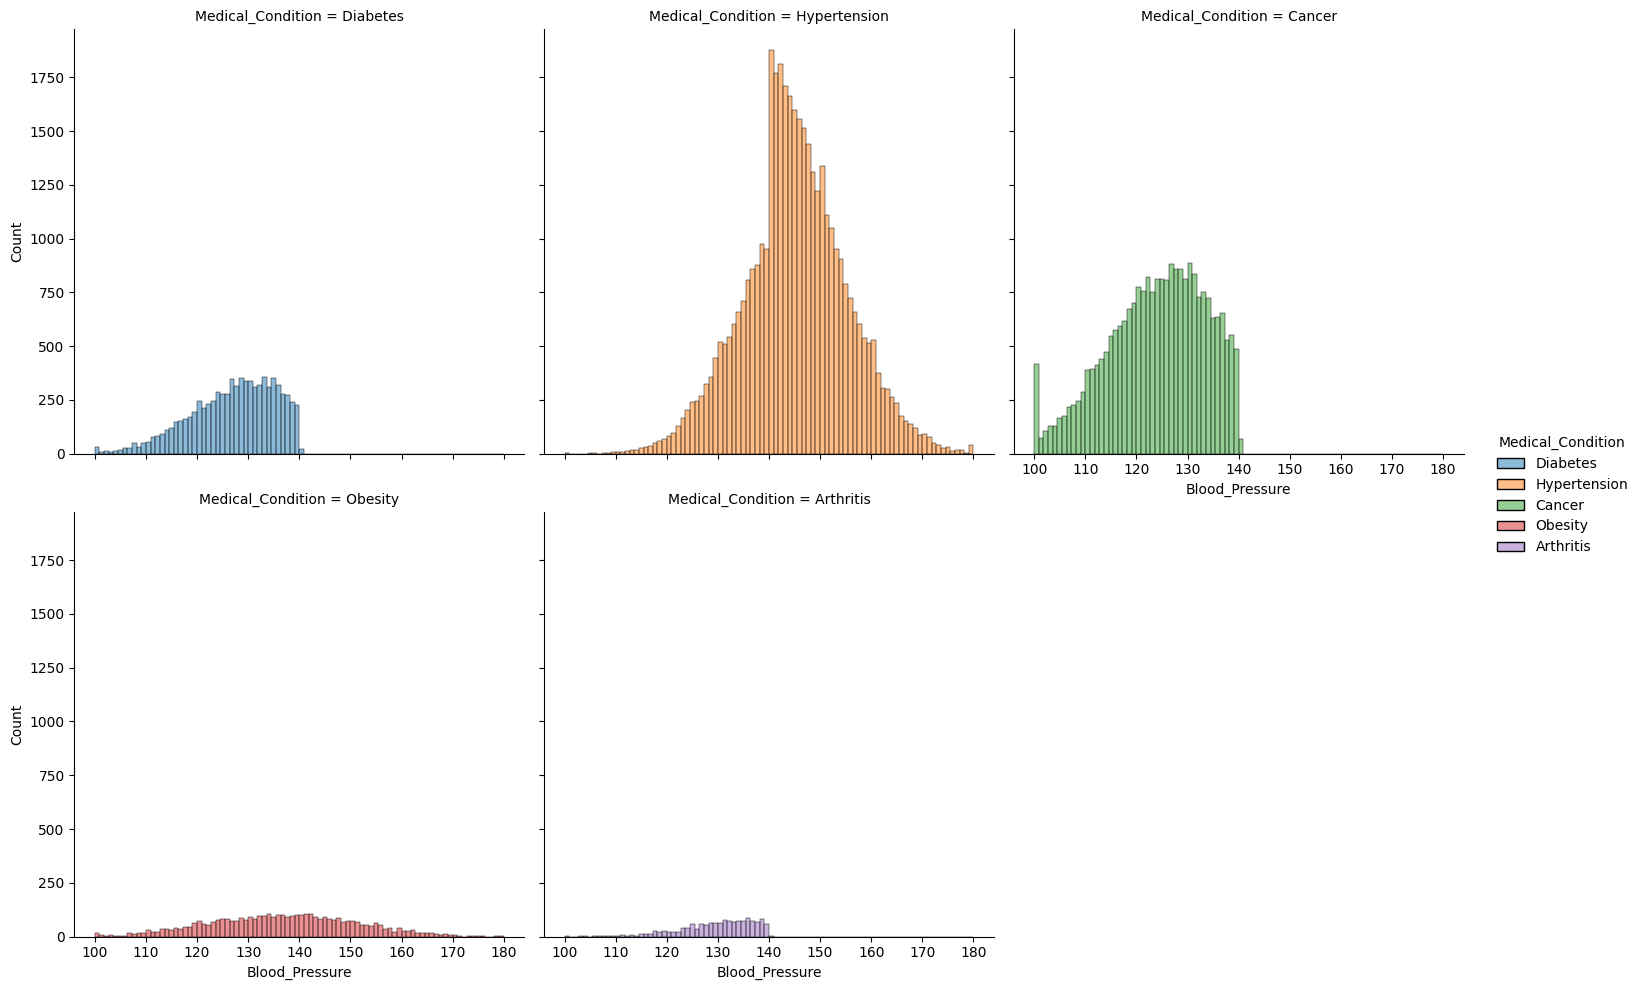

In [6]:
md_filtered = md[md["Medical_Condition"] != "Healthy"]
sns.displot(x=md_filtered["Blood_Pressure"], hue=md_filtered["Medical_Condition"], col=md_filtered["Medical_Condition"], col_wrap=3)
plt.show()



### 1. **IMC > 30, Dieta poco saludable, No realiza actividad física**  
- 💡 Podría revelar una conexión clara con **diabetes tipo 2**, **síndrome metabólico** y **enfermedades articulares**.  
- **Idea:** Analizar si el sedentarismo y la dieta son los principales factores desencadenantes o si el IMC alto es el factor dominante.  



In [7]:
BMI_30_Poor_Diet_no_Activity = md[(md["BMI"] > 30) & (md["Diet_Quality"]=="Poor") & (md["Physical_Activity"] =='Low')]
Diabetes = md[md["Medical_Condition"] == "Diabetes"]


### 2. **Consumo excesivo de alcohol, Fumador, IMC > 25**  
- 💡 La combinación de tabaquismo y alcohol podría aumentar el riesgo de **enfermedades hepáticas** y **cáncer**.  
- **Idea:** Examinar si el consumo excesivo de alcohol o el tabaquismo tiene un impacto mayor en el desarrollo de cáncer.  

In [8]:
Alcohol_Smoker_BMI_25 = md[(md["BMI"] > 25) & (md["Alcohol_Consumer"] == 1) & (md["Smoker"] == 1)]
Cancer = md[md["Medical_Condition"] == "Cancer"]


### 3. **Presión arterial alta, Fumador, Edad > 50**  
- 💡 Este grupo podría tener un riesgo elevado de **accidentes cerebrovasculares** y **enfermedades renales crónicas**.  
- **Idea:** Evaluar si la hipertensión o el tabaquismo tiene mayor influencia en la aparición de enfermedades renales.  


In [9]:
md_AND_sd_merged = pd.merge(md, sd, on='ID')
Pressure_130_Smoker_Age_50 = md_AND_sd_merged[(md_AND_sd_merged["Blood_Pressure"] >= 130) & (md_AND_sd_merged["Age"]>= 50) & (md_AND_sd_merged["Smoker"]== 1)]

### 4. **Edad > 60, Consumo excesivo de alcohol, Enfermedades previas (como diabetes)**  
- 💡 El deterioro de la salud asociado con la edad y enfermedades preexistentes podría aumentar el riesgo de **insuficiencia hepática** y **demencia**.  
- **Idea:** Investigar si las enfermedades previas o el alcohol tienen un efecto mayor en el deterioro de la salud cognitiva.  


In [10]:
md_AND_sd_merged = pd.merge(md, sd, on='ID')
Age_60_Alcohol_Ill = md_AND_sd_merged[(md_AND_sd_merged["Age"] >= 60) & (md_AND_sd_merged["Alcohol_Consumer"]==1)&(md_AND_sd_merged["Medical_Condition"]!="Healthy")]


### 5. **IMC > 30, Fumador, Presión arterial alta, No realiza actividad física**  
- 💡 Esta combinación podría relacionarse con **síndrome metabólico** y **enfermedades pulmonares** (como EPOC).  
- **Idea:** Evaluar cuál de los factores (IMC, tabaquismo o presión arterial) contribuye más a la aparición de enfermedades pulmonares.  

In [11]:
BMI_smoker_Pressure_130 = md[(md["BMI"]>= 30) & (md["Blood_Pressure"] >= 130) & (md["Physical_Activity"]== "Low")]



### 6. **Sexo femenino, Edad > 50, Dieta poco saludable, IMC > 30**  
- 💡 Las mujeres postmenopáusicas con sobrepeso y una dieta poco saludable podrían tener un mayor riesgo de **osteoporosis** y **cáncer de mama**.  
- **Idea:** Examinar si la dieta o el IMC tiene un impacto más fuerte en la incidencia de cáncer o problemas óseos.  

---

### 7. **Presión arterial alta, Consumo de alcohol, Enfermedad previa (renal)**  
- 💡 Las personas con hipertensión y enfermedad renal previa que consumen alcohol podrían experimentar un deterioro rápido de la función renal.  
- **Idea:** Analizar si el alcohol o la hipertensión es el principal factor de deterioro renal.  

---

### 8. **Bajo puntaje de salud, Dieta poco saludable, No realiza actividad física**  
- 💡 Un bajo puntaje de salud podría reflejar un comportamiento de riesgo que desencadena **síndrome metabólico**, **diabetes** y **depresión**.  
- **Idea:** Evaluar si el puntaje de salud bajo refleja principalmente dieta y ejercicio o si hay otros factores psicosociales involucrados.  